In [1]:
# Loads the autoreload extension in Notebook
%load_ext autoreload
# Sets the autoreload mode to reload all modules before executing code
%autoreload 2

# WAV - Audio data in uni-axis (mono)

Check audio specs

Check stereo audio specs

In [2]:
from caits.loading import wav_specs_check

In [3]:
audio_params = wav_specs_check("data/jmp-last-night.wav")

Information returned from the `wav_specs_check`:

* nchannels: number of audio channels (1 for mono, 2 for stereo)
* sampwidth: sample width in bytes
* framerate: sampling frequency
* nframes: number of audio frames
* comptype: compression type ('NONE' is the only supported type)
* compname: Human-readable version of `comptype`. Usually 'not compressed' parallels 'NONE'

In [4]:
audio_params

{'nchannels': 2,
 'sampwidth': 2,
 'framerate': 44100,
 'nframes': 605391,
 'comptype': 'NONE',
 'compname': 'not compressed'}

Information returned from the `wav_specs_check`:

* nchannels: number of audio channels (1 for mono, 2 for stereo)
* sampwidth: sample width in bytes
* framerate: sampling frequency
* nframes: number of audio frames
* comptype: compression type ('NONE' is the only supported type)
* compname: Human-readable version of `comptype`. Usually 'not compressed' parallels 'NONE'

In [5]:
wav_specs_check("data/jmp-last-night.wav", print_base=True)

Sample rate: 44100 Hz
Stereo


{'nchannels': 2,
 'sampwidth': 2,
 'framerate': 44100,
 'nframes': 605391,
 'comptype': 'NONE',
 'compname': 'not compressed'}

Check mono audio specs

In [6]:
audio_params = wav_specs_check("data/yes.wav")

In [7]:
audio_params

{'nchannels': 1,
 'sampwidth': 2,
 'framerate': 16000,
 'nframes': 16000,
 'comptype': 'NONE',
 'compname': 'not compressed'}

In [8]:
wav_specs_check("data/yes.wav", print_base=True)

Sample rate: 16000 Hz
Mono


{'nchannels': 1,
 'sampwidth': 2,
 'framerate': 16000,
 'nframes': 16000,
 'comptype': 'NONE',
 'compname': 'not compressed'}

Load audio

In [9]:
from caits.loading import wav_loader

In [10]:
audio_df, sr = wav_loader("data/yes.wav")

In [11]:
print(type(audio_df))
print(audio_df.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['ch_1'], dtype='object')


In [12]:
print(audio_df.shape)

(16000, 1)


In [13]:
audio_load_arr_pure = audio_df["ch_1"].values
print(audio_load_arr_pure.shape)

(16000,)


In [14]:
audio_df.head()

,ch_1
0,-0.000763
1,-0.000824
2,-0.000732
3,-0.000549
4,-0.000427


In [15]:
print(audio_df.values.shape)
print(audio_df.to_numpy().shape)

(16000, 1)
(16000, 1)


In [16]:
arr = audio_df.values
print(arr.shape)

(16000, 1)


### Plotting

In [17]:
from caits.visualization import plot_signal

Plot signal in samples

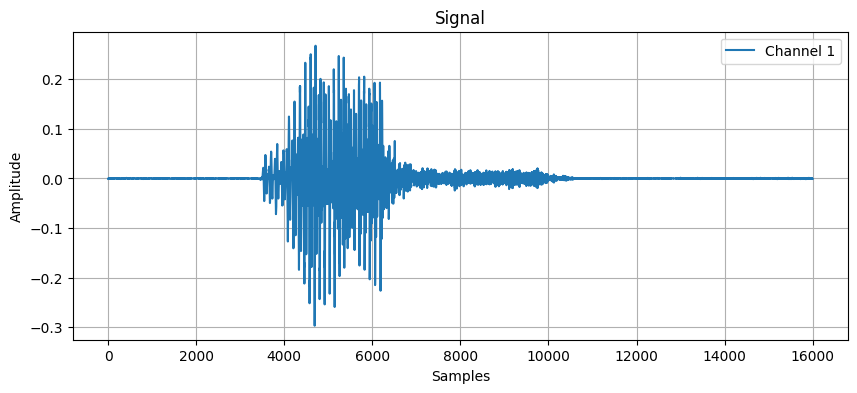

In [18]:
plot_signal(
    sig=arr,
    sr=sr, 
    return_mode=False
)

Plot signal in seconds

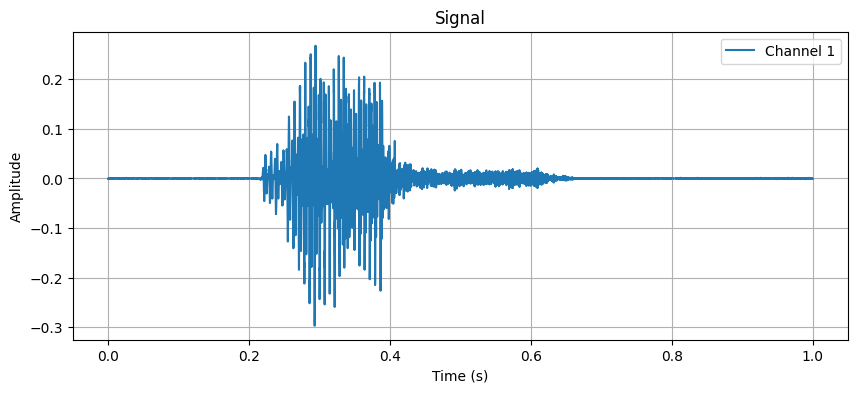

In [19]:
plot_signal(
    sig=arr,
    sr=sr, 
    mode="time", 
    return_mode=False
)

# Define different audio loading parameters

* use soundfile's capabilities as method WAV file loading
* load a 16KHz WAV file to 8KHz
* change the data type to "float32"
* name the channels (1 in our case), to "Mono"

In [20]:
audio_load_param = wav_loader(
    "data/yes.wav", 
    mode="soundfile",
    target_sr=8000,
    dtype="float32",
    channels=["Mono"]
)

In [21]:
audio_load_param[0].head()

,Mono
0,-0.000763
1,-0.000732
2,-0.000427
3,0.000030
4,0.000061


In [22]:
audio_load_param[0].values.shape

(8000, 1)

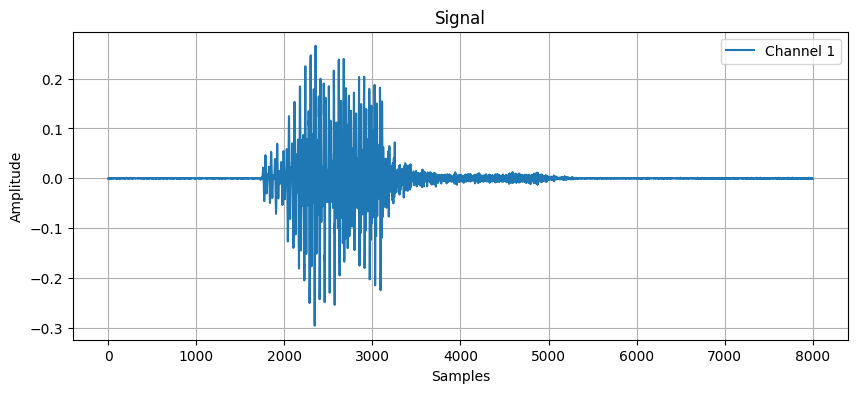

In [23]:
plot_signal(
    sig=audio_load_param[0].values, 
    sr=8000, 
    mode="samples", 
    return_mode=False
)

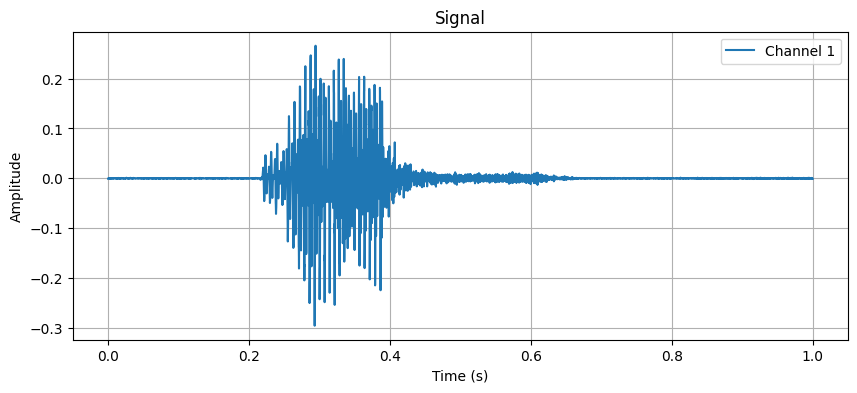

In [24]:
plot_signal(
    sig=audio_load_param[0].values, 
    sr=8000, 
    mode="time", 
    return_mode=False
)

# CSV - Multi-axis Motion Data

In [25]:
from caits.loading import csv_loader_single_file

In [26]:
motion_df = csv_loader_single_file(
    file_path="data/scratching_eye.csv"
)

In [27]:
motion_df.head()

,acc_x_axis_g,acc_y_axis_g,acc_z_axis_g,gyr_x_axis_deg/s,gyr_y_axis_deg/s,gyr_z_axis_deg/s
0,1.131,0.342,-0.063,37.515,-44.408,-62.647
1,1.120,0.323,-0.241,35.563,22.143,-35.258
2,1.023,0.431,-0.146,42.212,78.263,-1.525
3,0.856,0.600,0.086,50.142,131.516,18.056
4,0.752,0.709,0.327,55.815,168.116,26.779


In [28]:
motion_df.shape

(1034, 6)

In [29]:
motion_channels = motion_df.columns
motion_channels

Index(['acc_x_axis_g', 'acc_y_axis_g', 'acc_z_axis_g', 'gyr_x_axis_deg/s',
       'gyr_y_axis_deg/s', 'gyr_z_axis_deg/s'],
      dtype='object')

In [30]:
# transform motion_channels object to list
motion_channels = motion_channels.tolist()

In [31]:
arr_motion = motion_df.values

### Plotting

Plot the signals in samples and add the channels' names

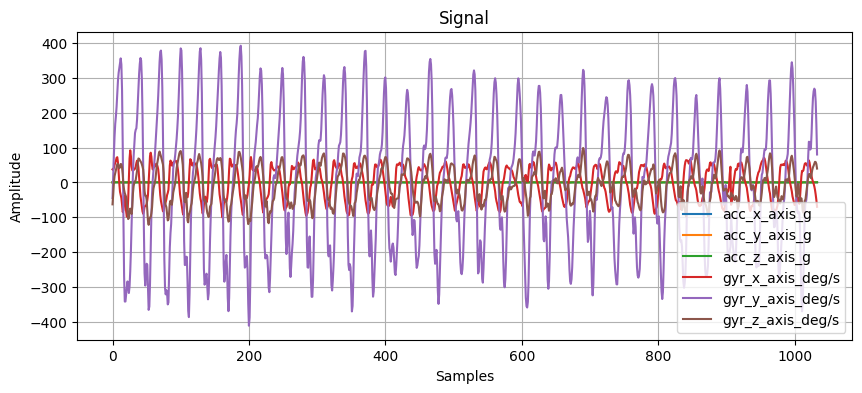

In [32]:
plot_signal(
    arr_motion,
    sr=100, 
    channels=motion_channels, 
    return_mode=False
)

Plot the signals in time and add the channels' names

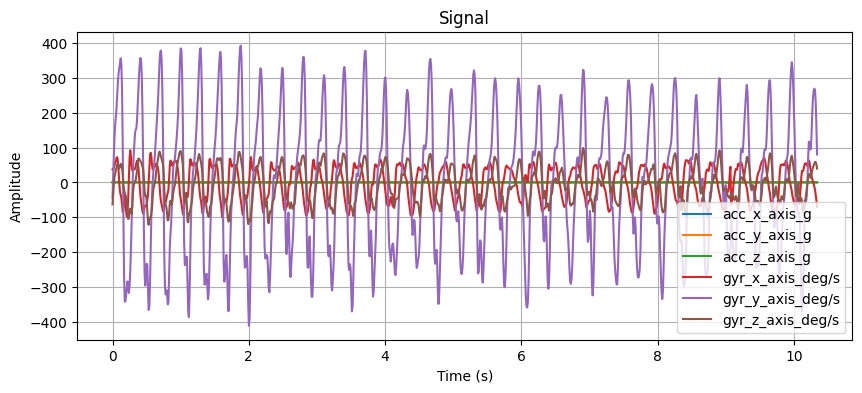

In [33]:
plot_signal(
    motion_df.values, 
    sr=100,
    mode="time", 
    channels=motion_channels, 
    return_mode=False
)